In [2]:
!pip install pandas numpy seaborn

Importing all of the packaged required for this analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('sales/retail_sales_dataset.csv')

In [4]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
data = data.rename(columns={'Customer ID': 'Customer','Product Category': 'Category','Price per Unit': 'Unit Price'})

In [6]:
data.isnull().sum()

,0
Transaction ID,0
Date,0
Customer,0
Gender,0
Age,0
Category,0
Quantity,0
Unit Price,0
Total Amount,0


Change the object in date to actual date

In [7]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d') # Changed the format to '%Y-%m-%d' to match the actual date format in the 'Date' column. This format represents dates as 'YYYY-MM-DD'.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction ID  1000 non-null   int64         
 1   Date            1000 non-null   datetime64[ns]
 2   Customer        1000 non-null   object        
 3   Gender          1000 non-null   object        
 4   Age             1000 non-null   int64         
 5   Category        1000 non-null   object        
 6   Quantity        1000 non-null   int64         
 7   Unit Price      1000 non-null   int64         
 8   Total Amount    1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


# What to analyse in this project
- multiplot bar graph showcasing the amount of women and men in the database
- spliting and showing the product category in a pie chart ( with percentages)
- calculating the total amount of each product category in a bar graph
- try and do a scatterplot showcasing the sales between a certain time period
- line graph showing product category buying age
- top 3 ages that spend the most money (boxplot)
- category with with the age that spent most money in each.
- age group split into the spending amount using a split graph
- Average quality amount bought in each product category
- try and do aa heatmap with all of the digits that are included in this dataset.

find out the range for all of the values so that it doesn't have any unordinary numbers - all looks GOOD. THIS STEP IS IMPORTANT IN DATA ANALYSIS. INCLUDE IT INSIDE OF THE PRESENTATIONS.

In [29]:
data.describe()

,Transaction ID,Date,Age,Quantity,Unit Price,Total Amount,Month
count,504.000000,504,504.000000,504.000000,504.000000,504.000000,504.000000
mean,494.001984,2023-04-03 22:14:17.142856960,41.454365,2.533730,181.944444,463.819444,3.567460
min,2.000000,2023-01-01 00:00:00,18.000000,1.000000,25.000000,25.000000,1.000000
25%,242.750000,2023-02-17 00:00:00,29.000000,1.000000,30.000000,60.000000,2.000000
50%,480.500000,2023-04-08 12:00:00,42.000000,3.000000,50.000000,135.000000,4.000000
75%,744.250000,2023-05-16 00:00:00,54.000000,4.000000,300.000000,900.000000,5.000000
max,1000.000000,2024-01-01 00:00:00,64.000000,4.000000,500.000000,2000.000000,6.000000
std,290.768226,NaN,13.853174,1.150181,192.677557,564.279256,1.688286


<ipython-input-39-327fd06a045b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=data,palette=['lightcoral','mediumslateblue'])


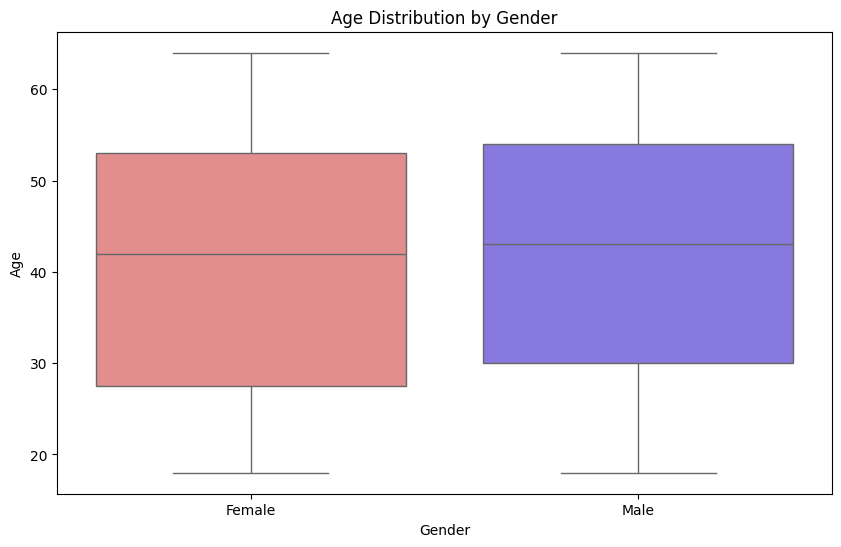

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=data,palette=['lightcoral','mediumslateblue'])

plt.title('Age Distribution by Gender')
plt.show()


product category by age

<ipython-input-40-ba6f77f3ced2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category',y='Age',data=data, palette = ['greenyellow','aquamarine','navajowhite'])


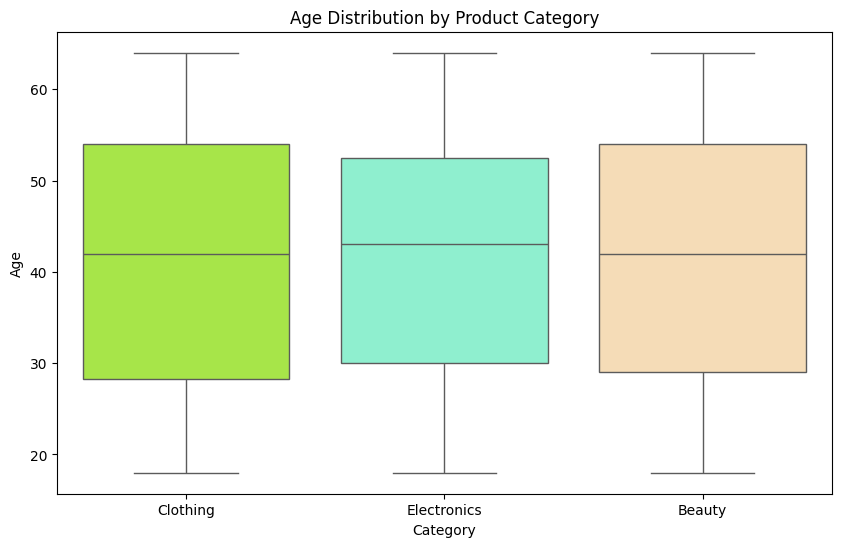

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Category',y='Age',data=data, palette = ['greenyellow','aquamarine','navajowhite'])
plt.title('Age Distribution by Product Category')
plt.show()

quantity distribution (x) by sales amount

<ipython-input-44-0724b61c320a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Quantity',y='Total Amount',data=data, palette = ['greenyellow','aquamarine','navajowhite'])
<ipython-input-44-0724b61c320a>:2: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Quantity',y='Total Amount',data=data, palette = ['greenyellow','aquamarine','navajowhite'])


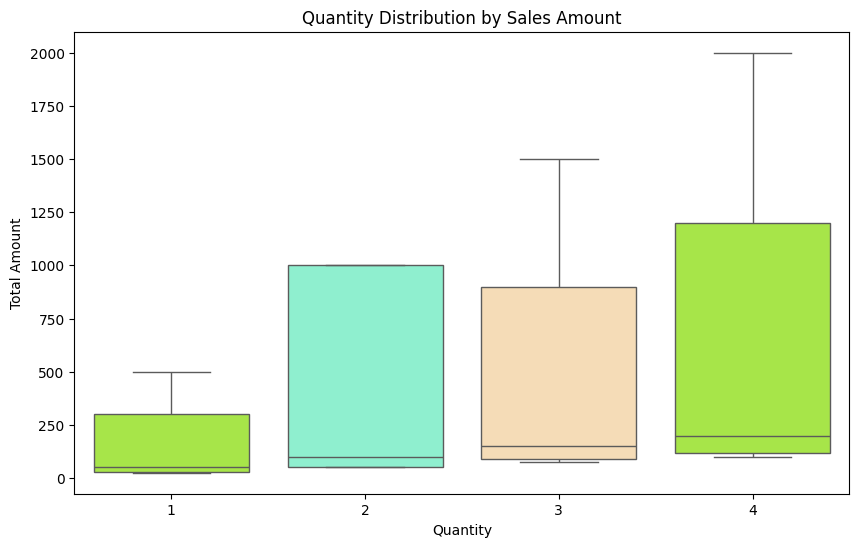

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Quantity',y='Total Amount',data=data, palette = ['greenyellow','aquamarine','navajowhite'])
plt.title('Quantity Distribution by Sales Amount')
plt.show()

490
510
1000


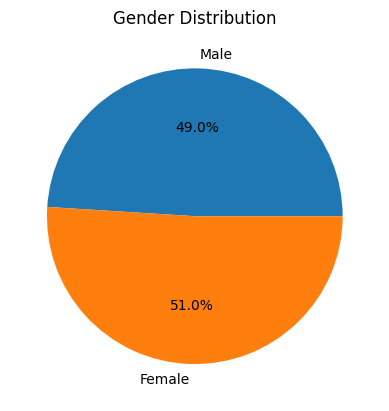

In [9]:
male_count = data.loc[data.Gender == 'Male']['Gender'].count()
print(male_count)
female_count = data.loc[data.Gender == 'Female']['Gender'].count()
print(female_count)
total = data.loc[(data.Gender == 'Male') | (data.Gender == 'Female')]['Gender'].count()
print(total)


plt.pie([male_count, female_count], labels = ['Male', 'Female'], autopct = '%1.1f%%')
plt.title('Gender Distribution')
plt.show()

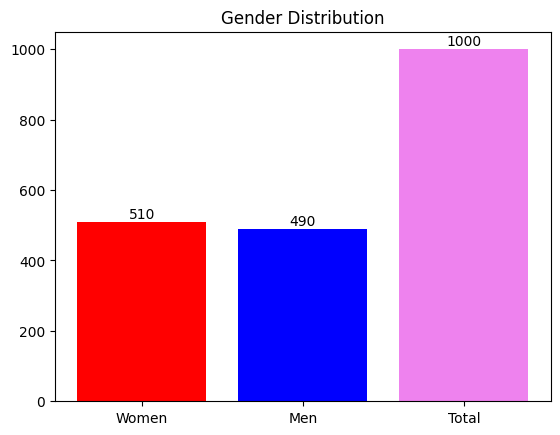

In [10]:
plt.bar(['Women','Men','Total'], [female_count, male_count,total],color=['red','blue','violet'])
plt.title('Gender Distribution')
for i, value in enumerate([female_count,male_count,total]):
    plt.text(i, value + 10, str(value), ha='center', fontsize=10)  # Adjust +10 if needed for spacing

plt.ylim(0, max([female_count,male_count,total]) + 50)  # Optional: add space above bars
plt.show()

plt.show()

splitting and showing the product category in one pie chart


In [11]:
category = data['Category'].unique()
print(category)

beauty = data.loc[data.Category == 'Beauty']['Category'].count()
print(beauty)

clothing = data.loc[data.Category == 'Clothing']['Category'].count()
print(clothing)

electronics = data.loc[data.Category == 'Electronics']['Category'].count()
print(electronics)


total_amount = data['Category'].count()
print(total_amount)

beauty_percentage = (beauty/total_amount)*100
print(beauty_percentage)

clothing_percentage = (clothing/total_amount)*100
print(clothing_percentage)

electronics_percentage = (electronics/total_amount)*100
print(electronics_percentage)

total_percentage = beauty_percentage,clothing_percentage,electronics_percentage
print(total_percentage)

['Beauty' 'Clothing' 'Electronics']
307
351
342
1000
30.7
35.099999999999994
34.2
(np.float64(30.7), np.float64(35.099999999999994), np.float64(34.2))


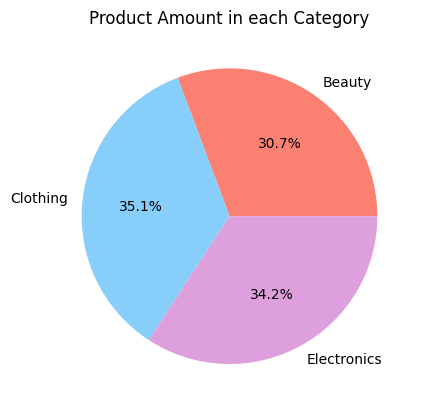

In [12]:
plt.pie(total_percentage,labels = ['Beauty','Clothing','Electronics'],autopct='%1.1f%%', colors = ['salmon','lightskyblue','plum'])
plt.title('Product Amount in each Category')
plt.show()

calculating the total amount of each product category in a bar graph



Text(0.5, 1.0, 'Total Amount of each Product Category')

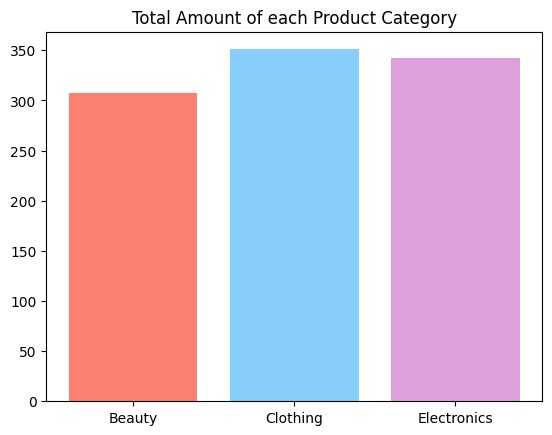

In [13]:
plt.bar(['Beauty','Clothing','Electronics'],[beauty,clothing,electronics],color=['salmon','lightskyblue','plum'])
plt.title('Total Amount of each Product Category')

try and do a scatterplot showcasing the sales between a certain time period


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction ID  1000 non-null   int64         
 1   Date            1000 non-null   datetime64[ns]
 2   Customer        1000 non-null   object        
 3   Gender          1000 non-null   object        
 4   Age             1000 non-null   int64         
 5   Category        1000 non-null   object        
 6   Quantity        1000 non-null   int64         
 7   Unit Price      1000 non-null   int64         
 8   Total Amount    1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


line graph showing product category buying age


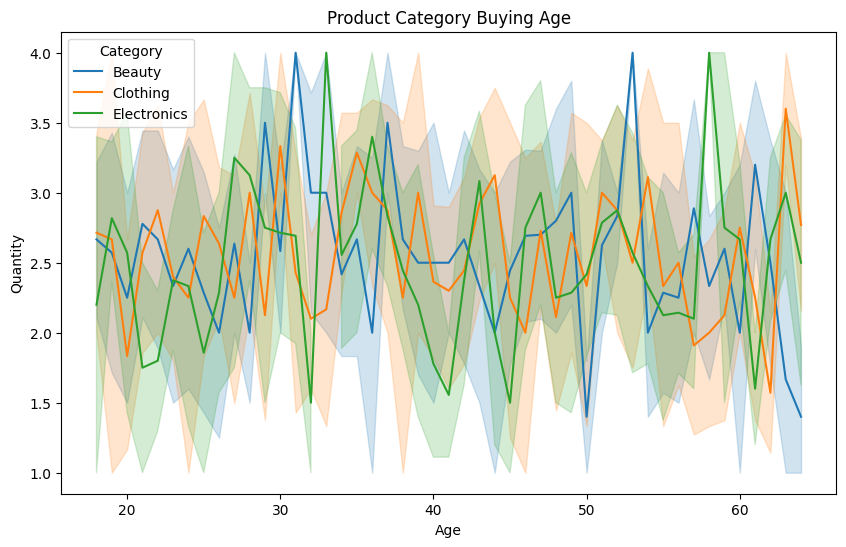

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age',y='Quantity',hue = 'Category',data=data)
plt.title('Product Category Buying Age')
plt.show()

Top 3 ages that spend the most money (3 way bar plot - one category for each age)

[34 26 50 37 30 45 46 63 52 23 35 22 64 42 19 27 47 62 18 49 28 38 43 39
 44 51 58 48 55 20 40 54 36 31 21 57 25 56 29 61 32 41 59 60 33 53 24]
Age
43    17970
34    16785
51    16065
Name: Total Amount, dtype: int64
Category
Beauty         7405
Clothing       3700
Electronics    5680
Name: Total Amount, dtype: int64
Category
Beauty         2545
Clothing       6415
Electronics    9010
Name: Total Amount, dtype: int64
Category
Beauty         4575
Clothing       3645
Electronics    7845
Name: Total Amount, dtype: int64


<ipython-input-16-664c177eb2a4>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beauty_values = [age34_category_amount[0],age43_category_amount[0],age51_category_amount[0]]
<ipython-input-16-664c177eb2a4>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  clothing_values = [age34_category_amount[1],age43_category_amount[1],age51_category_amount[1]]
<ipython-input-16-664c177eb2a4>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  el

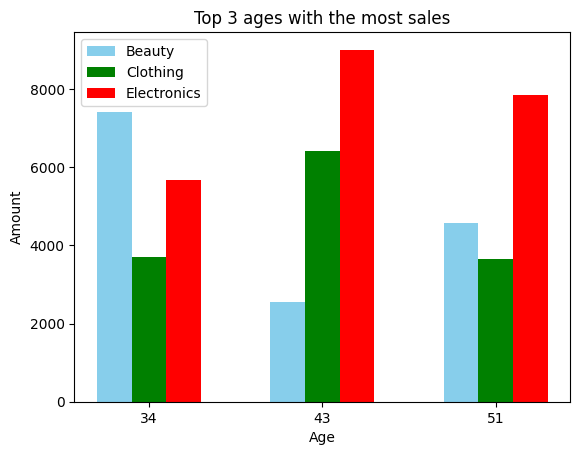

In [16]:
present_age = data['Age'].unique()
print(present_age)

total_amount_age = data.groupby('Age')['Total Amount'].sum().sort_values(ascending=False).head(3)
print(total_amount_age)


age34_category_amount = data.loc[data.Age == 34].groupby('Category')['Total Amount'].sum()
print(age34_category_amount)


age43_category_amount = data.loc[data.Age == 43].groupby('Category')['Total Amount'].sum()
print(age43_category_amount)

age51_category_amount = data.loc[data.Age == 51].groupby('Category')['Total Amount'].sum()
print(age51_category_amount)


total_ages = ['34','43','51']
bar_width = 0.2
x = range(len(total_ages))




beauty_values = [age34_category_amount[0],age43_category_amount[0],age51_category_amount[0]]
clothing_values = [age34_category_amount[1],age43_category_amount[1],age51_category_amount[1]]
electronics_values = [age34_category_amount[2],age43_category_amount[2],age51_category_amount[2]]



plt.bar(x,beauty_values,width=bar_width,label='Beauty',color='skyblue')
plt.bar([p + bar_width for p in x], clothing_values, width=bar_width, label='Clothing', color='green')
plt.bar([p + 2 * bar_width for p in x], electronics_values, width=bar_width, label='Electronics', color='red')
plt.title('Top 3 ages with the most sales')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.xticks(ticks=[p + bar_width for p in x], labels=total_ages)
plt.legend()
plt.show()


the amount of sales made per month across 2023 for the first 6 months


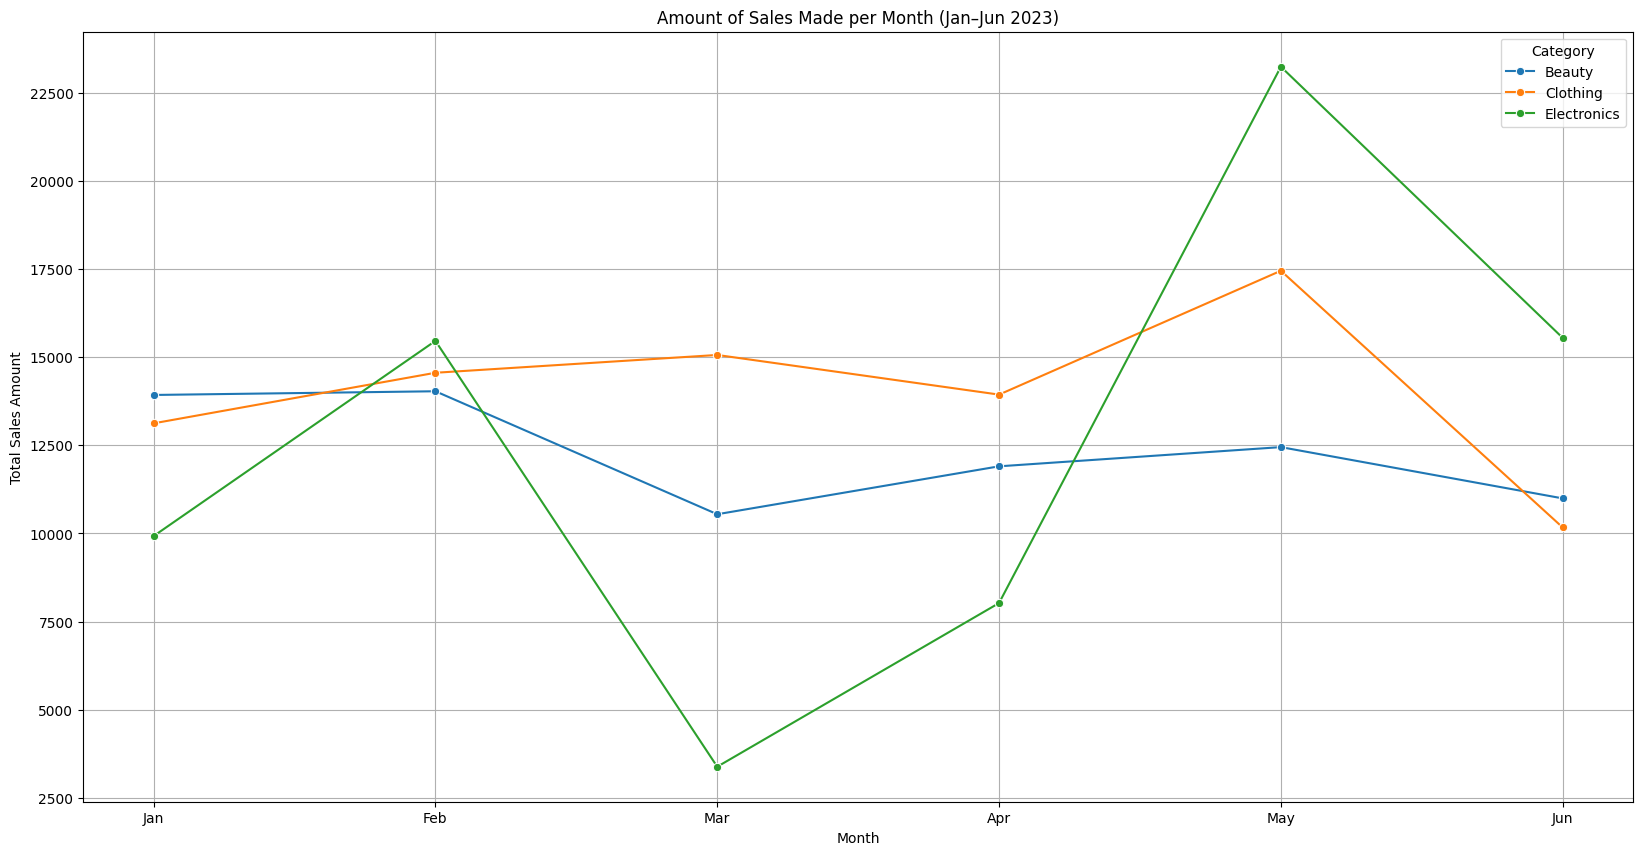

In [33]:
data['Month'] = data['Date'].dt.month
data = data[data['Month'] <= 6]


monthly_sales = data.groupby(['Month', 'Category'])['Total Amount'].sum().reset_index()


plt.figure(figsize=(20,10))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', hue='Category', marker='o')
plt.title('Amount of Sales Made per Month (Jan–Jun 2023)')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(range(1, 7), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.grid(True)
plt.show()

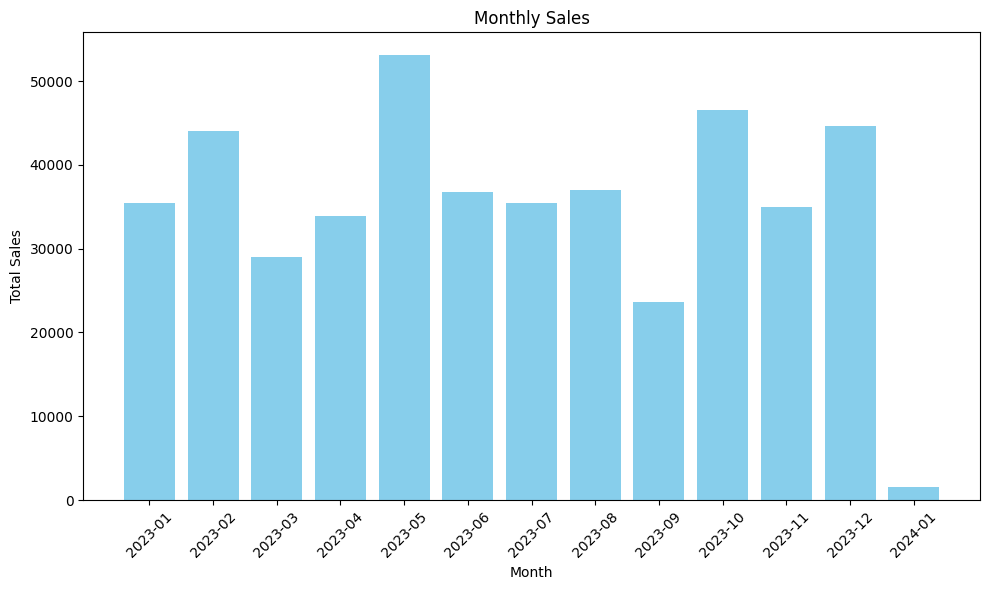

In [18]:
data['YearMonth'] = data['Date'].dt.to_period('M')

# Group by Year-Month and sum Total Amount
monthly_sales = data.groupby('YearMonth')['Total Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['YearMonth'].astype(str), monthly_sales['Total Amount'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.tight_layout()
plt.show()

We can see that May of 2023 had the most sales, lets split it up into categories


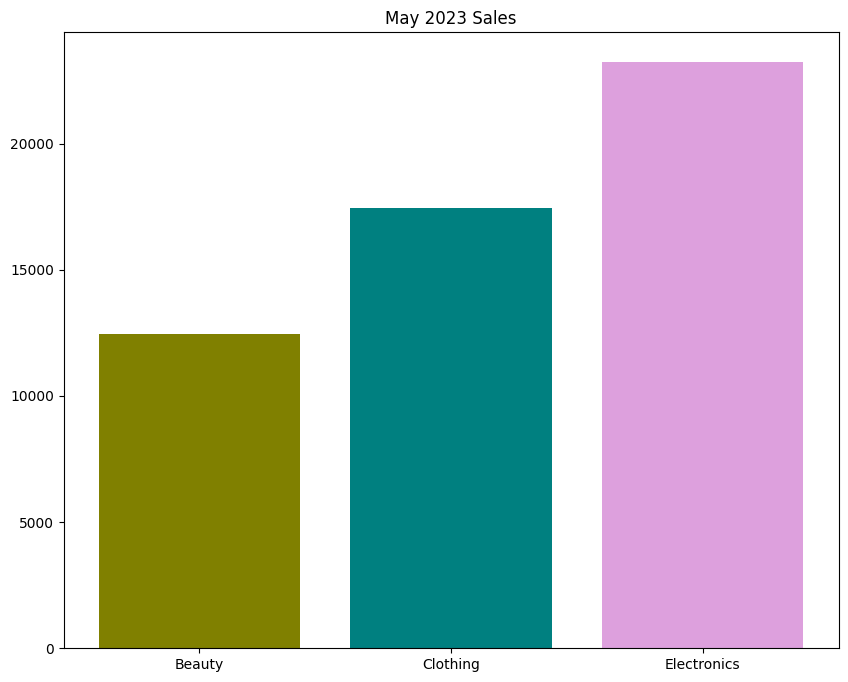

In [19]:
cat = ['Beauty','Clothing','Electronics']
May = data.loc[data.YearMonth == '2023-05']
May_cat = May.groupby('Category')['Total Amount'].sum()


plt.figure(figsize=(10,8))
plt.bar(cat,May_cat,color =['olive','teal','plum'])
plt.title('May 2023 Sales')
plt.show()

Average quality amount bought in each product category - box plot?


In [20]:

beauty_sales = data[data['Category'] == 'Beauty']

# Sum the 'Total Amount' column
total_beauty_sales = beauty_sales['Total Amount'].sum()

total_beauty_count = beauty_sales['Total Amount'].count()

average_beauty_sales = total_beauty_sales / total_beauty_count

sum_beauty = print(f"This is the total amount for beauty sales: {total_beauty_sales}")


clothing_sales = data[data['Category'] == 'Clothing']

total_clothing_sales = clothing_sales['Total Amount'].sum()

total_clothing_count = clothing_sales['Total Amount'].count()

average_clothing_sales = total_clothing_sales / total_clothing_count


sum_beauty = print(f"This is the total amount for clothing sales: {total_clothing_sales}")


electronics_sales = data[data['Category'] == 'Electronics']

total_electronic_sales = electronics_sales['Total Amount'].sum()

total_electronic_count = electronics_sales['Total Amount'].count()

average_electronics_sales = total_electronic_sales / total_electronic_count



sum_electronics = print(f"This is the total amount for electronics sales: {total_clothing_sales}")


This is the total amount for beauty sales: 143515
This is the total amount for clothing sales: 155580
This is the total amount for electronics sales: 155580


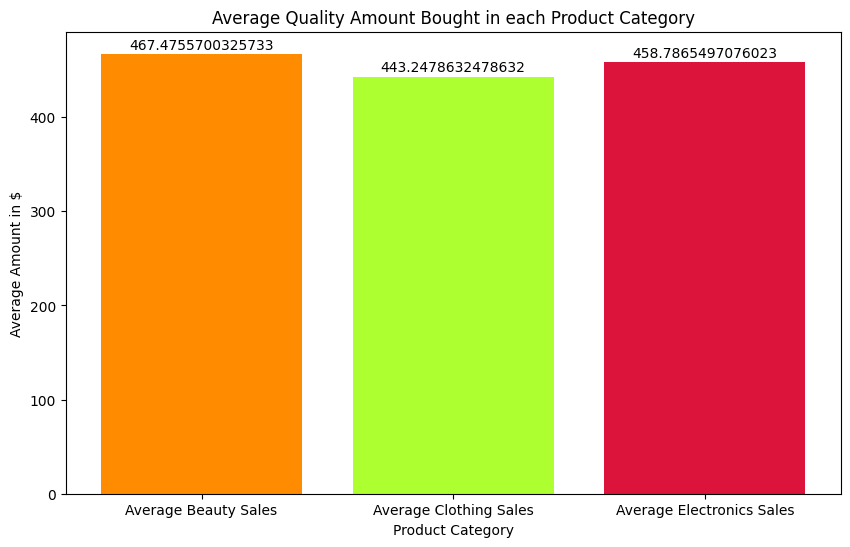

In [31]:

total_average = [average_beauty_sales,average_clothing_sales,average_electronics_sales]

average_label = ['Average Beauty Sales','Average Clothing Sales','Average Electronics Sales']


plt.figure(figsize=(10,6))
plt.bar(average_label,total_average,color=['darkorange','greenyellow','crimson']) # Changed code to remove unnecessary indexing.
plt.title('Average Quality Amount Bought in each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Amount in $')

for i, value in enumerate(total_average):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)  # Adjust +10 if needed for spacing
plt.show()